# 📊 Loan Approval Classification Dataset Overview
This dataset offers a comprehensive view of loan applications along with key financial and demographic attributes that contribute to assessing loan approval or rejection. The data includes both applicant-specific and loan-specific features that can help model the probability of loan approval. Below is a quick summary:

🔢 Number of Records: 45,000
🧩 Total Features: 14 (mix of Categorical and Continuous types)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df=pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


# handling outlier

In [5]:
df.loc[df["person_age"] > 70]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
32355,78.0,male,Associate,58463.0,57,RENT,3000.0,MEDICAL,7.51,0.05,25.0,754,No,0
32381,73.0,female,Bachelor,51415.0,47,MORTGAGE,5000.0,PERSONAL,7.49,0.10,28.0,706,No,0
32416,94.0,male,High School,29738.0,76,RENT,6500.0,MEDICAL,11.01,0.22,27.0,773,No,0
32422,80.0,male,High School,77894.0,62,RENT,6800.0,MEDICAL,11.71,0.09,25.0,673,No,0
32432,73.0,male,Bachelor,90678.0,47,RENT,7800.0,MEDICAL,11.01,0.09,24.0,696,Yes,0


In [6]:
df = df.loc[~(df["person_age"] > 70)]

In [7]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [8]:
df['person_age'] = df['person_age'].astype('int')
df['person_age'].dtypes

dtype('int64')

In [9]:
df.duplicated().sum()

0

# EDA

In [10]:
cat_cols = [var for var in df.columns if df[var].dtypes == 'object']
num_cols = [var for var in df.columns if df[var].dtypes != 'object']

print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')

Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


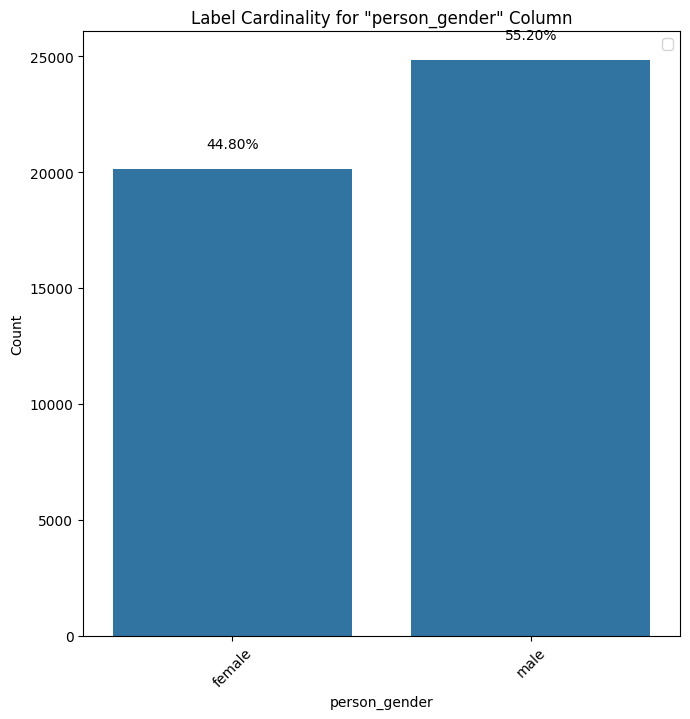

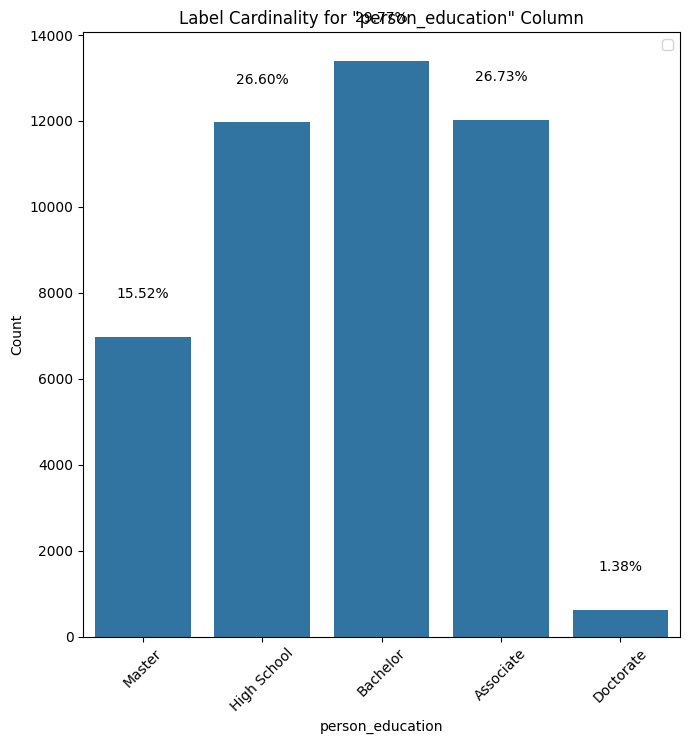

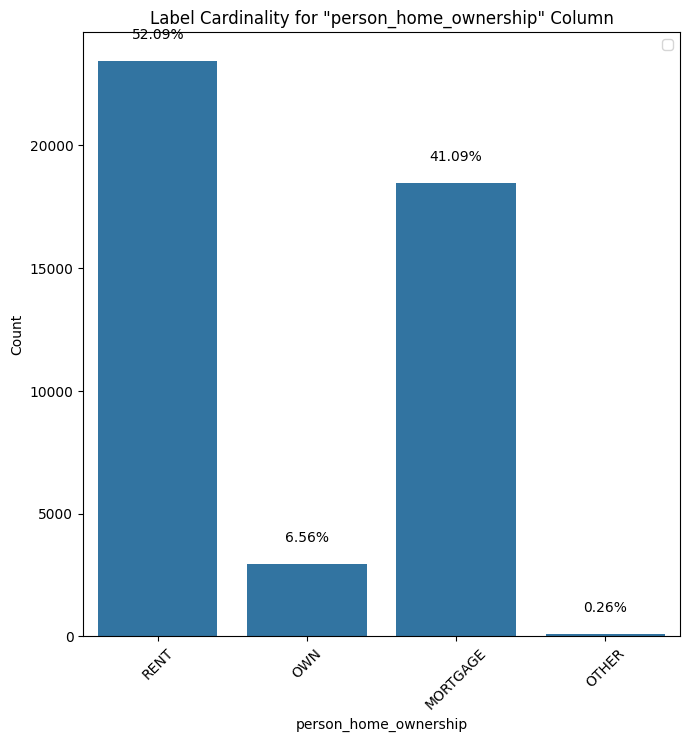

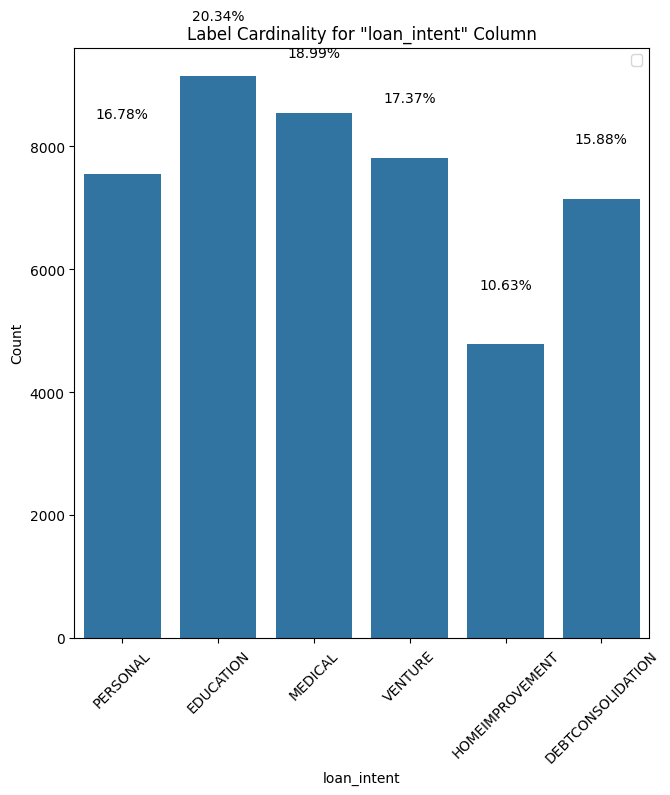

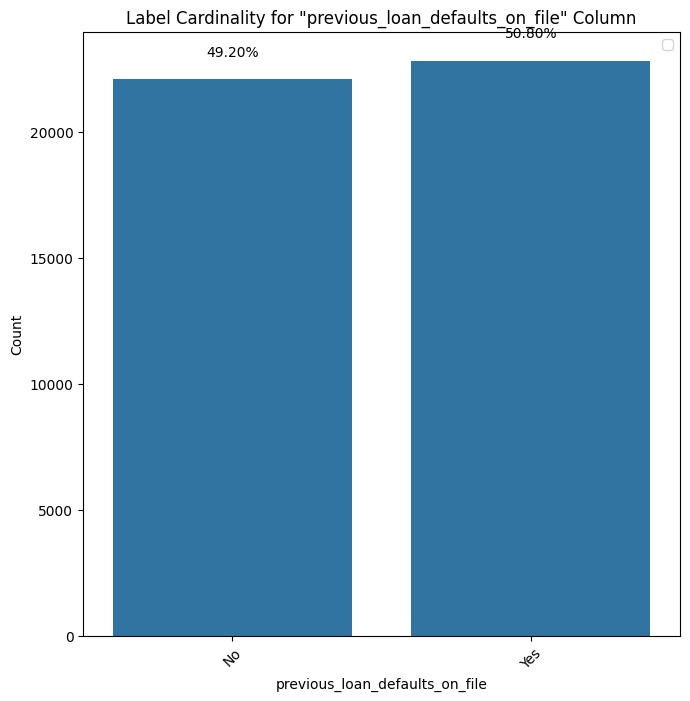

In [11]:
def plot_categorical_column(dataframe, column):

    plt.figure(figsize=(7, 7))
    ax = sns.countplot(x=dataframe[column])
    total_count = len(dataframe[column])
    category_counts = dataframe[column].value_counts(normalize=True) * 100
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 0.02 * total_count, f'{percentage:.2f}%', ha="center")

    plt.title(f'Label Cardinality for "{column}" Column')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.tight_layout()
    plt.xticks(rotation=45)

    plt.legend()
    plt.show()

for col in cat_cols:
    plot_categorical_column(df, col)

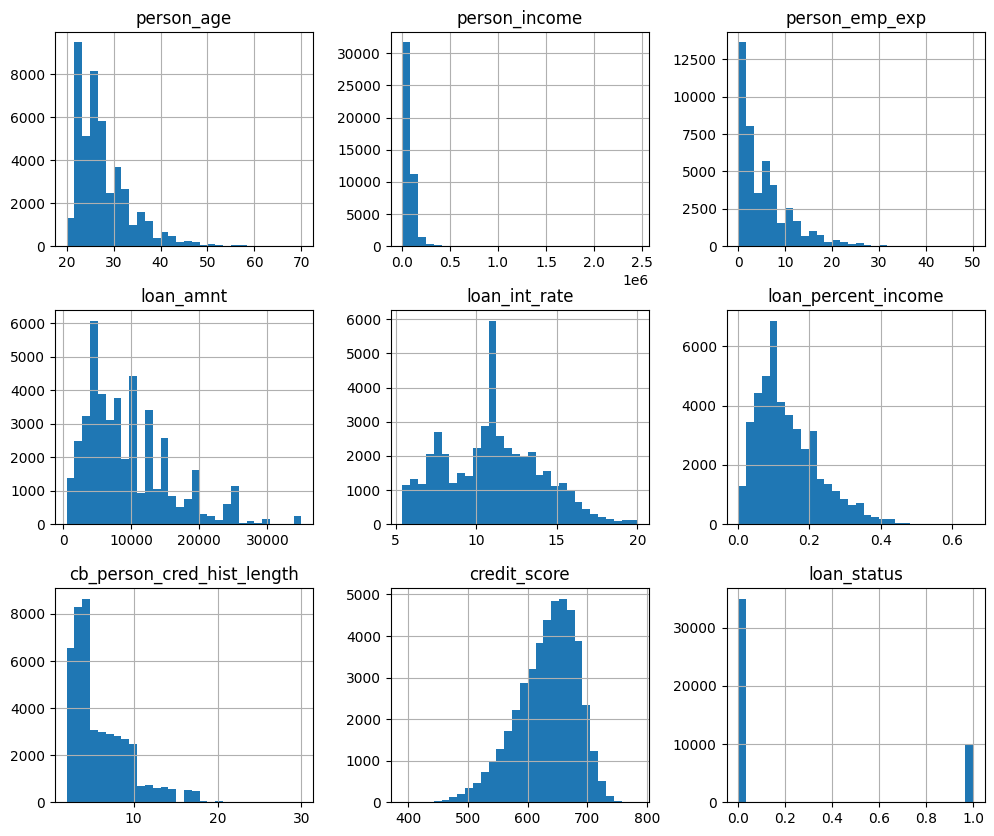

In [12]:
df[num_cols].hist(bins=30, figsize=(12,10))
plt.show()

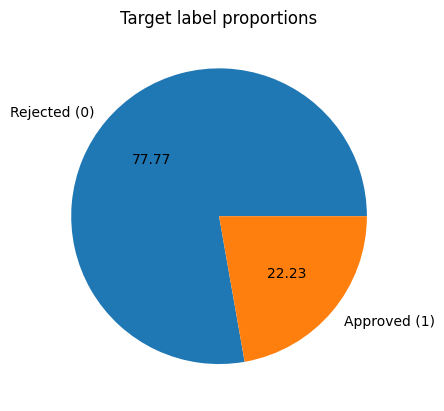

In [13]:
label_prop = df['loan_status'].value_counts()

plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f')
plt.title('Target label proportions')
plt.show()

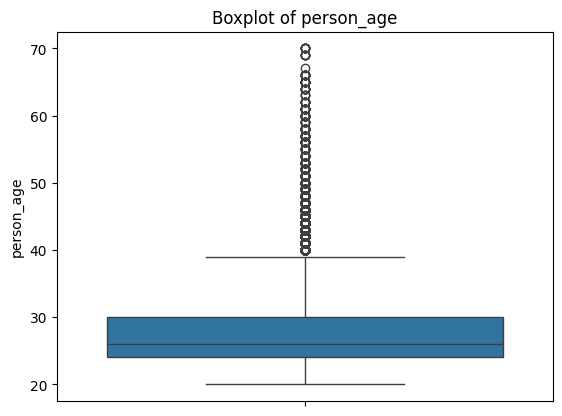

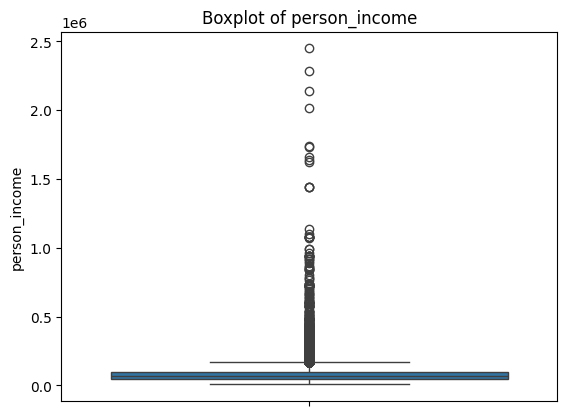

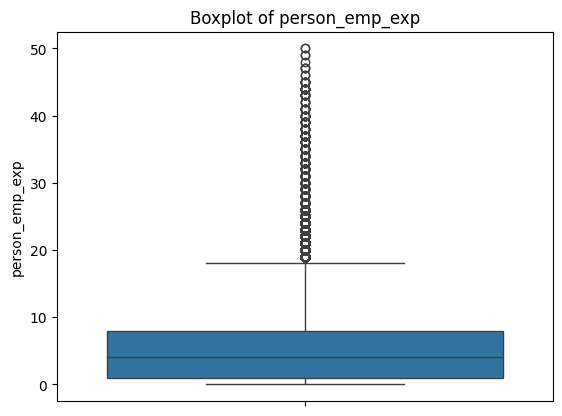

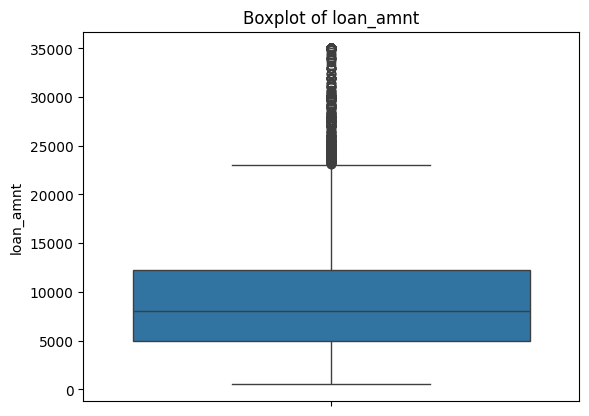

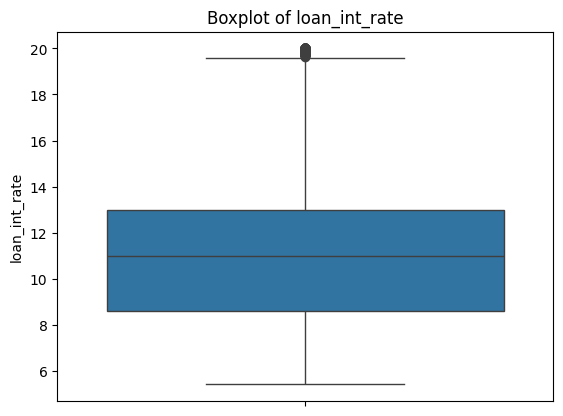

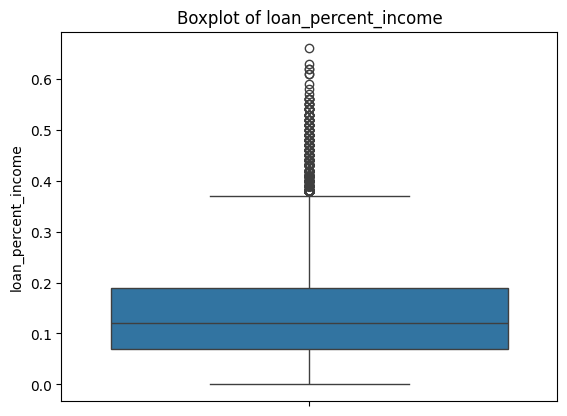

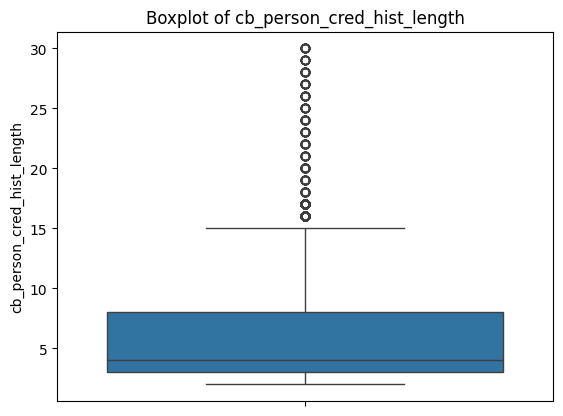

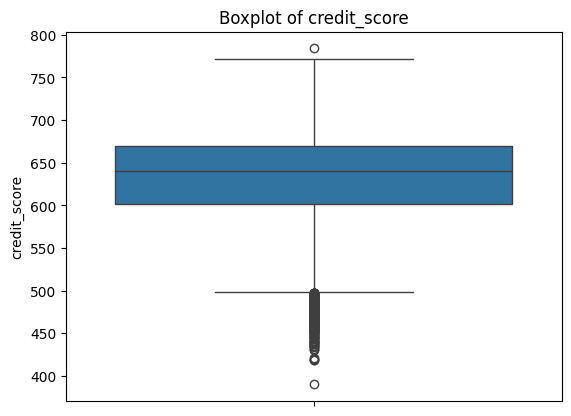

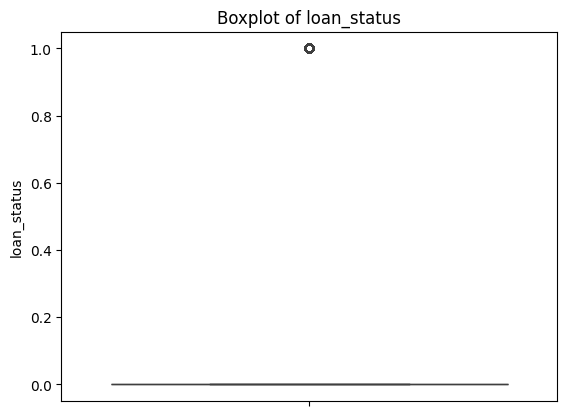

In [14]:
for col in num_cols:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

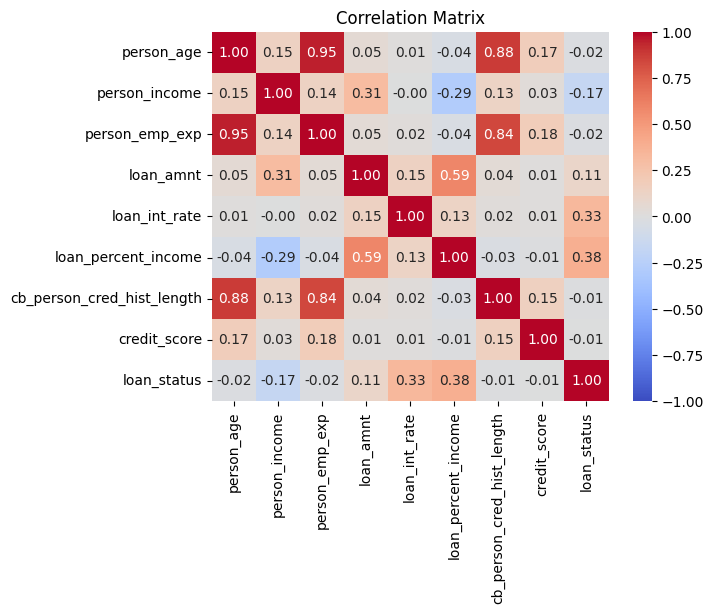

In [15]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmax = 1, vmin = -1)
plt.title("Correlation Matrix")
plt.show()

In [16]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# Feature Engineering


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['previous_loan_defaults_on_file'] = le.fit_transform(df['previous_loan_defaults_on_file'])
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df['person_education'] = le.fit_transform(df['person_education'])
df['person_gender'] = le.fit_transform(df['person_gender'])

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['loan_amnt', 'person_income']] = scaler.fit_transform(df[['loan_amnt', 'person_income']])


In [19]:
# Feature Selection
#selecting best features for the target using f_classif method
from sklearn.feature_selection import SelectKBest, f_classif
X = df.drop(columns='loan_status',axis =1)
y = df['loan_status']
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Get feature scores
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Print the feature scores
print(feature_scores)

                           Feature         Score
12  previous_loan_defaults_on_file  18838.499652
9              loan_percent_income   7821.400321
8                    loan_int_rate   5573.623479
5            person_home_ownership   2603.562652
3                    person_income   1323.429436
6                        loan_amnt    527.834111
7                      loan_intent    234.895235
0                       person_age     17.746406
4                   person_emp_exp     15.960847
10      cb_person_cred_hist_length      9.198638
11                    credit_score      2.355057
2                 person_education      0.143872
1                    person_gender      0.011086


In [20]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,0,4,0.026201,0,3,1.000000,4,16.02,0.49,3.0,561,0,1
1,21,0,3,0.001754,0,2,0.014493,1,11.14,0.08,2.0,504,1,0
2,25,0,3,0.001818,3,0,0.144928,3,12.87,0.44,3.0,635,0,1
3,23,0,1,0.029399,0,3,1.000000,3,15.23,0.44,2.0,675,0,1
4,24,1,4,0.023819,1,3,1.000000,3,14.27,0.53,4.0,586,0,1


# Model Selection and Implementaion

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_classifier,
                           param_grid=param_grid,
                           scoring='roc_auc',  # Use ROC-AUC as the evaluation metric
                           cv=5,              # 5-fold cross-validation
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best ROC-AUC Score during cross-validation:", best_score)

# Refit the model with the best hyperparameters
best_dt_model = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best ROC-AUC Score during cross-validation: 0.9596922961222962


# Evaluation metrics and result interpretation


Test Set ROC-AUC Score: 0.8523952799335226

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6987
           1       0.89      0.73      0.80      2010

    accuracy                           0.92      8997
   macro avg       0.91      0.85      0.88      8997
weighted avg       0.92      0.92      0.92      8997



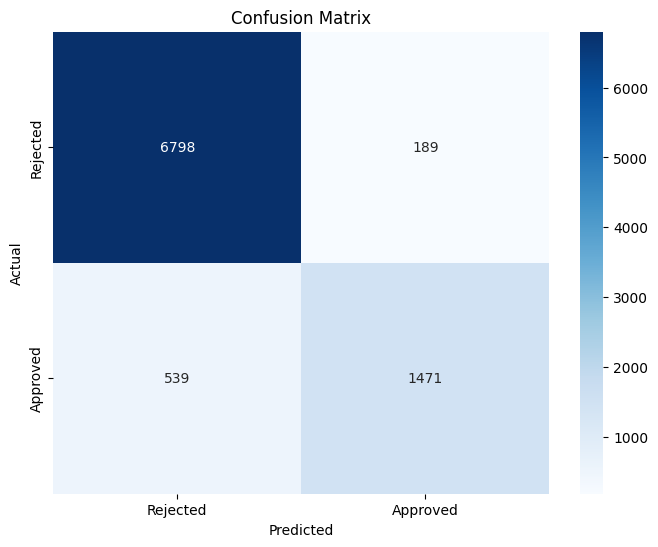

In [22]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Evaluate the model on the test set
y_pred = best_dt_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)

print("\nTest Set ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Test Set ROC-AUC Score: 0.85
Interpretation: The ROC-AUC score of 0.85 indicates that the model has good performance in distinguishing between the two classes (approved vs not approved). A score of 1.0 would be perfect, and 0.5 would be no better than random guessing. So, 0.85 is a strong result.
# Classification Report
**Precision**
Precision for 0 (Not Approved): 0.93
This means that 93% of the cases predicted as "Not Approved" are actually correct.

Precision for 1 (Approved): 0.89
This means that 89% of the cases predicted as "Approved" are actually correct.

**Recall**
Recall for 0 (Not Approved): 0.97
This means that 97% of all actual "Not Approved" cases were correctly identified by the model.

Recall for 1 (Approved): 0.73
This means that 73% of all actual "Approved" cases were correctly identified by the model.

**F1-Score**
F1-Score for 0 (Not Approved): 0.95
The F1-Score is the harmonic mean of precision and recall, and for "Not Approved," this score suggests a very well-balanced performance.

F1-Score for 1 (Approved): 0.80
For "Approved" loans, the F1-Score indicates a somewhat less balanced performance compared to "Not Approved."

**Support**
Support for 0 (Not Approved): 6987
This means there are 6987 instances of "Not Approved" in the test set.

Support for 1 (Approved): 2010
There are 2010 instances of "Approved" in the test set.

# Accuracy
Accuracy: 0.92 (92%)
The model correctly predicted 92% of the cases in the test set.

In [28]:
# want to make compare between actual and predicted
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare.head(10)

,Actual,Predicted
24998,1,1
34588,0,0
1635,0,0
34702,0,1
22022,0,1
34301,0,0
5571,0,0
32476,0,0
31265,0,0
5696,0,0
